# Dual Momentum GEM
    
    (optimize lookback)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from talib.abstract import *

import pinkfish as pf
import strategy

# format price data
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [2]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

Some global data

In [3]:
symbols = ['XLB', 'XLE', 'XLF', 'XLI', 'XLK', 'XLP', 'XLU', 'XLV', 'XLY']
#symbols = ['IWB', 'SPY', 'VGK', 'IEV', 'EWJ', 'EPP', 'IEF', 'SHY', 'GLD']
#symbols = ['SPY', 'TLT', 'NLY', 'GLD']

capital = 10000
start = datetime.datetime(1900, 1, 1)
#start = datetime.datetime.strptime(pf.SP500_BEGIN, '%Y-%m-%d')
end = datetime.datetime.now()
#end = datetime.datetime(2019, 1, 1)
# num months lookback
lookback = 12

use_cache = True
use_absolute_mom = True
use_regime_filter = True

Define Optimizations

In [4]:
# pick one
optimize_lookback = False
optimize_top_tier = True

# define lookback
if optimize_lookback:
    Xs = range(3, 18+1, 1)
    Xs = [str(X) for X in Xs]

if optimize_top_tier:
    Xs = range(1, 4+1, 1)
    Xs = [str(X) for X in Xs]

Run Strategy

In [5]:
strategies = pd.Series(dtype=object)
for X in Xs:
    print("{0}".format(X), end=" ")
    if optimize_lookback:
        strategies[X] = strategy.Strategy(symbols, capital, start, end, margin=1, lookback=int(X),
                                          use_cache=use_cache, use_absolute_mom=use_absolute_mom,
                                          use_regime_filter=use_regime_filter, top_tier=3)
    if optimize_top_tier:
        strategies[X] = strategy.Strategy(symbols, capital, start, end, margin=1, lookback=lookback,
                                          use_cache=use_cache, use_absolute_mom=use_absolute_mom,
                                          use_regime_filter=use_regime_filter, top_tier=int(X))
    strategies[X].run()
    strategies[X].rlog, strategies[X].tlog, strategies[X].dbal = strategies[X].get_logs()
    strategies[X].stats = strategies[X].get_stats()

1 2 3 4 

Summarize results

In [7]:
metrics = ('annual_return_rate',
           'max_closed_out_drawdown',
           'annualized_return_over_max_drawdown',
           'drawdown_recovery_period',
           'best_month',
           'worst_month',
           'sharpe_ratio',
           'sortino_ratio',
           'monthly_std',
           'pct_time_in_market',
           'total_num_trades',
           'pct_profitable_trades',
           'avg_points')

df = strategy.summary(strategies, metrics)
df

,1,2,3,4
annual_return_rate,7.63,7.57,6.73,6.59
max_closed_out_drawdown,-31.82,-33.13,-30.15,-31.04
annualized_return_over_max_drawdown,0.24,0.23,0.22,0.21
drawdown_recovery_period,438.00,Not Recovered Yet,Not Recovered Yet,Not Recovered Yet
best_month,18.16,12.13,11.37,11.12
worst_month,-28.80,-30.25,-27.63,-28.77
sharpe_ratio,0.51,0.57,0.55,0.56
sortino_ratio,0.53,0.57,0.55,0.55
monthly_std,4.35,3.53,3.21,3.14
pct_time_in_market,66.38,66.38,66.38,66.38


Bar graphs

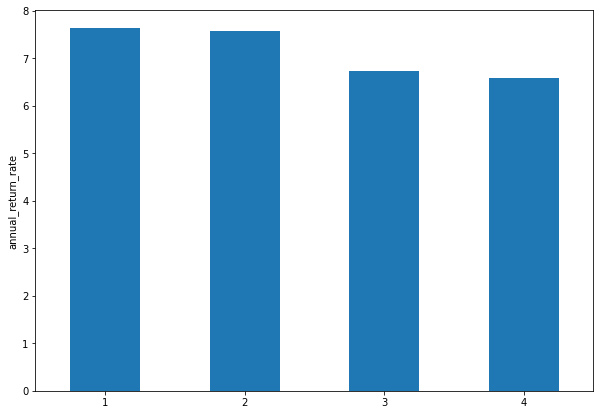

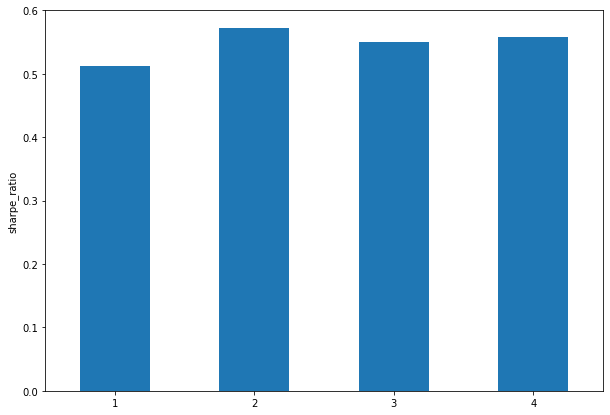

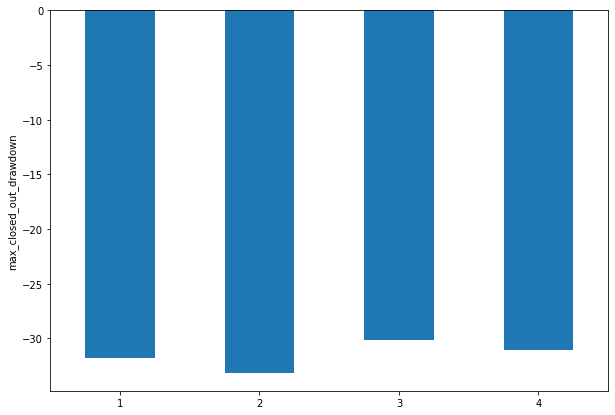

In [8]:
strategy.plot_bar_graph(df, 'annual_return_rate')
strategy.plot_bar_graph(df, 'sharpe_ratio')
strategy.plot_bar_graph(df, 'max_closed_out_drawdown')

Run Benchmark

In [10]:
s = strategies[Xs[0]]
benchmark = pf.Benchmark('SPY', capital, s.start, s.end, use_adj=True)
benchmark.run()

Equity curve

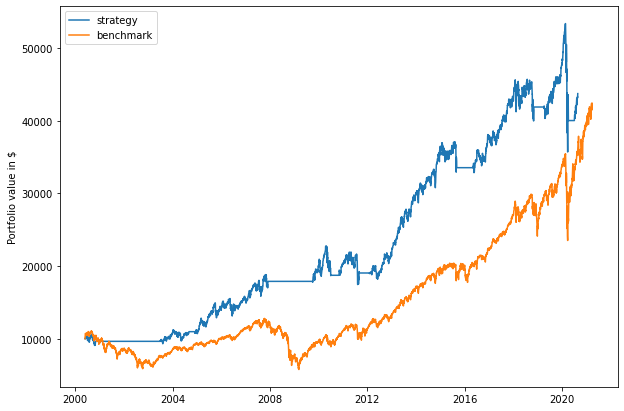

In [11]:
if optimize_lookback: Y = '12'
if optimize_top_tier: Y = '2'

pf.plot_equity_curve(strategies[Y].dbal, benchmark=benchmark.dbal)

In [12]:
def plot_equity_curves(strategies):
    """
    Plot Equity Curve: multiple equity curves on same plot
    Arguement is daily balance.
    """
    fig = plt.figure(figsize=(16,12))
    axes = fig.add_subplot(111, ylabel='Portfolio value in $')
    for strategy in strategies:
        axes.plot(strategy.dbal['close'], label=strategy.top_tier)

    plt.legend(loc='best')

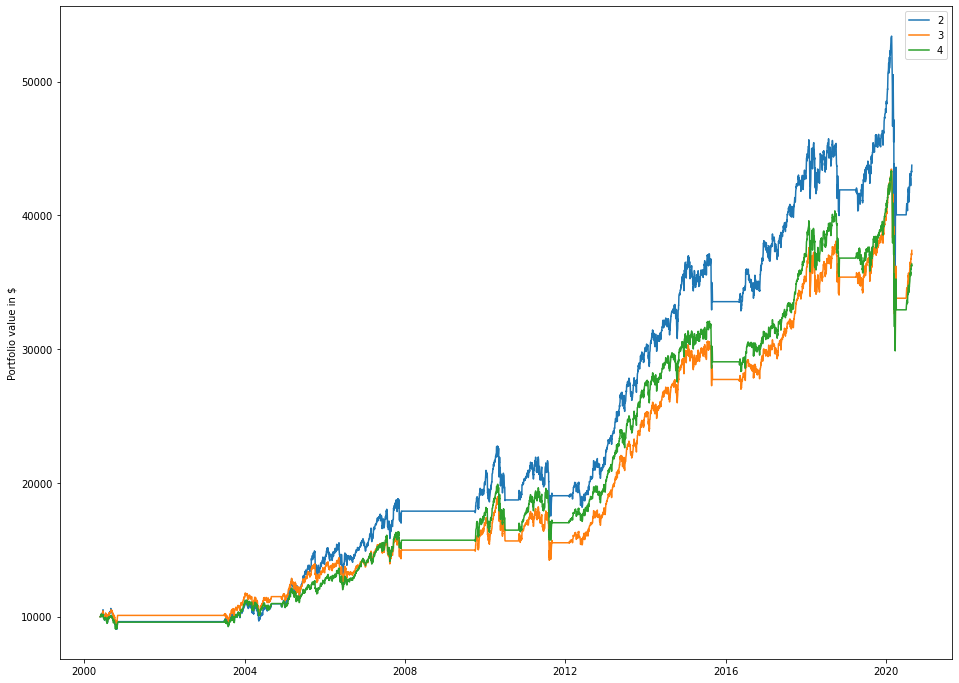

In [13]:
plot_equity_curves(strategies[1:4:1])